___
# Ciência dos Dados - PROJETO 1

## Rafael Vieira Rosenzvaig
___

## A Internet virou uma prioridade no Brasil?

___
## Introdução

Durante as últimas décadas, a internet no Brasil veio se difundindo casa vez mais, de modo que mais de 50% (TIC domicílios 2014) dos domicílios brasileiros já tem acesso à internet. Porém, <b>será que a internet tem sido algo que os brasileiros passaram a priorizar mais que outros meios de comunicação, como a televisão, rádio, entre outros?</b> Ou seja, será que a porcentagem de lares com intenet passou a porcentagem de lares com meios de comunicação mais tradicionais? Ao analisarmos esses dados, poderemos observar uma evuloção ao longo dos anos em relação à internet nos domicílios brasileiros? Essa pesquisa visa responder essas perguntas de forma objetiva a partir da análise de gráficos obtidos a partir da pesquisa do PNAD de 2013 a 2015.

Artigos relacionados:
http://g1.globo.com/tecnologia/noticia/2015/09/pela-1-vez-acesso-internet-chega-50-das-casas-no-brasil-diz-pesquisa.html
https://www.tecmundo.com.br/internet/8949-20-anos-de-internet-no-brasil-aonde-chegamos-.htm
http://www.brasil.gov.br/ciencia-e-tecnologia/2016/09/pesquisa-revela-que-mais-de-100-milhoes-de-brasileiros-acessam-a-internet


___
## Análise e Resultados

In [146]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [147]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MacWin\Documents\Ciencia dos dados\PNAD - Projeto 1


In [148]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

##########Dados de 2015##########


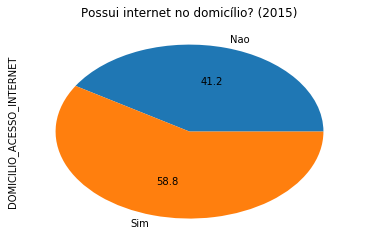

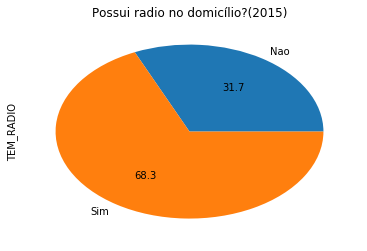

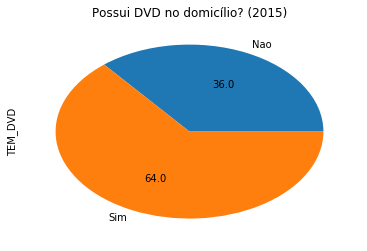

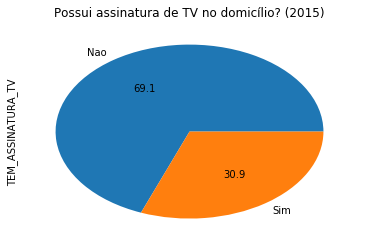

In [149]:
#2015
print("##########Dados de 2015##########")
dados = pd.read_csv('DOM2015.csv',sep=",")
#Internet
dados.V02322 = dados.V02322.astype('category')
dados.loc[(dados.V02322 == 2),"DOMICILIO_ACESSO_INTERNET"] = "Sim"
dados.loc[(dados.V02322 == 4),"DOMICILIO_ACESSO_INTERNET"] = "Nao"
#Radio
dados.V0225 = dados.V0225.astype('category')
dados.loc[(dados.V0225 == 1),"TEM_RADIO"] = "Sim"
dados.loc[(dados.V0225 == 3),"TEM_RADIO"] = "Nao"
#DVD
dados.V2027 = dados.V2027.astype('category')
dados.loc[(dados.V2027 == 1),"TEM_DVD"] = "Sim"
dados.loc[(dados.V2027 == 3),"TEM_DVD"] = "Nao"
#TV de Plasma
for i in range(0,11):
    dados.loc[(dados.V02270 == i),"NUMERO_TV_PLASMA"] = int(i)
#TV de Tubo
for i in range(0,11):
    dados.loc[(dados.V02271 == i),"NUMERO_TV_TUBO"] = int(i)
#Assinatura de TV
dados.V02272 = dados.V02272.astype('category')
dados.loc[(dados.V02272 == 1),"TEM_ASSINATURA_TV"] = "Sim"
dados.loc[(dados.V02272 == 3),"TEM_ASSINATURA_TV"] = "Nao"

#TABELA
tabela = pd.concat([dados.DOMICILIO_ACESSO_INTERNET,dados.TEM_RADIO,dados.TEM_DVD,dados.NUMERO_TV_PLASMA,dados.NUMERO_TV_TUBO,dados.TEM_ASSINATURA_TV], axis=1)
tabela = tabela.dropna()

#GRAFICO 1 - Freq. Relativa Internet
acessoInter = (tabela.DOMICILIO_ACESSO_INTERNET.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoInter.plot(kind='pie',title='Possui internet no domicílio? (2015)',autopct='%.1f')
plt.show()

#GRAFICO 2 - Freq. Relativa Radio
acessoRadio = (tabela.TEM_RADIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoRadio.plot(kind='pie',title='Possui radio no domicílio?(2015)',autopct='%.1f')
plt.show()

#GRAFICO 3 - Freq. Relativa DVD
acessoDvd = (tabela.TEM_DVD.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoDvd.plot(kind='pie',title='Possui DVD no domicílio? (2015)',autopct='%.1f')
plt.show()

#GRAFICO 4 - Freq. Relativa TV
acessoTV = (tabela.TEM_ASSINATURA_TV.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoTV.plot(kind='pie',title='Possui assinatura de TV no domicílio? (2015)',autopct='%.1f')
plt.show()

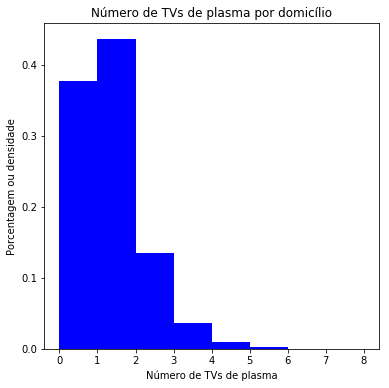

In [150]:
# Tabelas univariada - TV de plasma
faixa = range(0,9,1)
#plasma = pd.cut(tabela.NUMERO_TV_PLASMA, bins=faixa, right=False)
#TVplasma = (plasma.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = dados.NUMERO_TV_PLASMA.plot.hist(bins=faixa, title='Número de TVs de plasma por domicílio', figsize=(6, 6), normed=1,color='b')
plt.ylabel('Porcentagem ou densidade')
plt.xlabel('Número de TVs de plasma')
plt.show()

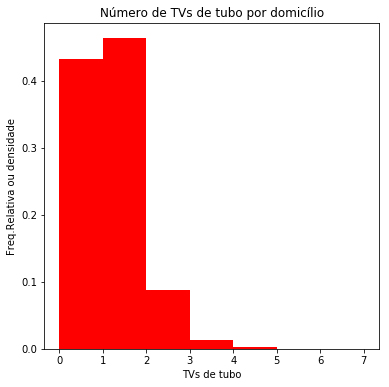

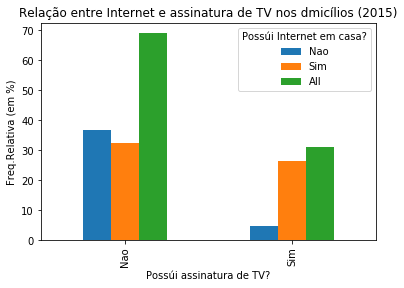

In [151]:
# Tabelas univariada - TV de tubo
faixa = np.arange(0,8,1)
plot = dados.NUMERO_TV_TUBO.plot.hist(bins=faixa, title='Número de TVs de tubo por domicílio', figsize=(6, 6), normed=1,color='r')
plt.ylabel('Freq.Relativa ou densidade')
plt.xlabel('TVs de tubo')
plt.show()

#Tabela cruzada - TEM INTERNET x TEM ASSINATURA TV
crossINTERNET_ASS=pd.crosstab(dados.TEM_ASSINATURA_TV, dados.DOMICILIO_ACESSO_INTERNET, margins=True, rownames=['Possúi assinatura de TV?'], colnames=['Possúi Internet em casa?'], normalize=True)*100
plot = crossINTERNET_ASS.iloc[0:2].plot(kind='bar', title='Relação entre Internet e assinatura de TV nos dmicílios (2015)')
plt.ylabel('Freq.Relativa (em %)')
plt.show()



#
tabela.to_csv('Projeto1_vFINAL2015_Rafael.csv', sep=',')
#tabela[(dados.DOMICILIO_ACESSO_INTERNET == "Sim") | (dados.DOMICILIO_ACESSO_INTERNET == "Nao")]
#tabela
#porcent = pd.Series([acessoInter["Sim"], acessoRadio["Sim"], acessoDvd["Sim"], acessoTV["Sim"]],[acessoInter["Nao"], acessoRadio["Nao"], acessoDvd["Nao"], acessoTV["Nao"]])
#porcent

##########Dados de 2014##########


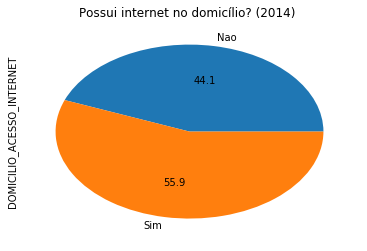

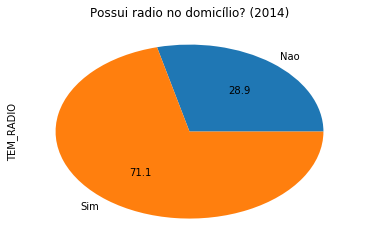

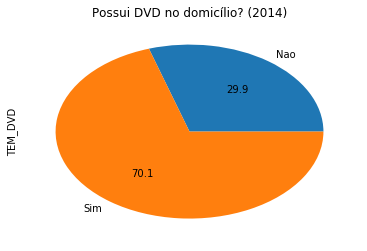

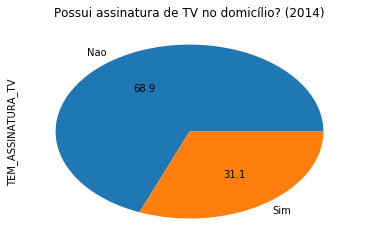

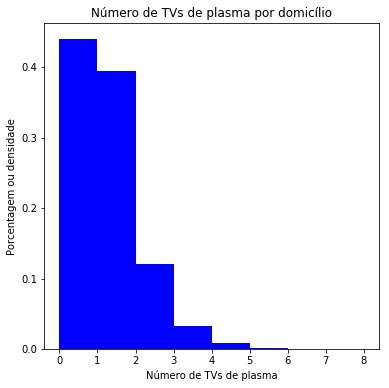

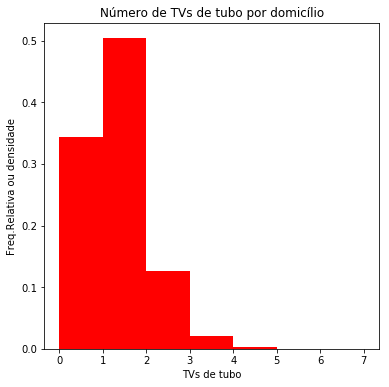

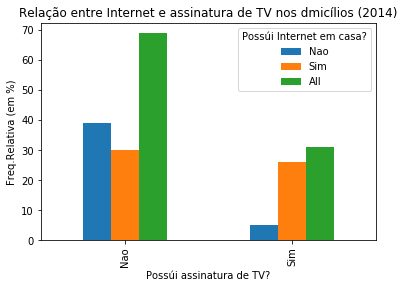

In [152]:
#2014
print("##########Dados de 2014##########")
dados = pd.read_csv('DOM2014.csv',sep=",")
#Internet
dados.V02322 = dados.V02322.astype('category')
dados.loc[(dados.V02322 == 2),"DOMICILIO_ACESSO_INTERNET"] = "Sim"
dados.loc[(dados.V02322 == 4),"DOMICILIO_ACESSO_INTERNET"] = "Nao"
#Radio
dados.V0225 = dados.V0225.astype('category')
dados.loc[(dados.V0225 == 1),"TEM_RADIO"] = "Sim"
dados.loc[(dados.V0225 == 3),"TEM_RADIO"] = "Nao"
#DVD
dados.V2027 = dados.V2027.astype('category')
dados.loc[(dados.V2027 == 1),"TEM_DVD"] = "Sim"
dados.loc[(dados.V2027 == 3),"TEM_DVD"] = "Nao"
#TV de Plasma
for i in range(0,11):
    dados.loc[(dados.V02270 == i),"NUMERO_TV_PLASMA"] = int(i)
#TV de Tubo
for i in range(0,11):
    dados.loc[(dados.V02271 == i),"NUMERO_TV_TUBO"] = int(i)
#Assinatura de TV
dados.V02272 = dados.V02272.astype('category')
dados.loc[(dados.V02272 == 1),"TEM_ASSINATURA_TV"] = "Sim"
dados.loc[(dados.V02272 == 3),"TEM_ASSINATURA_TV"] = "Nao"

#TABELA
tabela = pd.concat([dados.DOMICILIO_ACESSO_INTERNET,dados.TEM_RADIO,dados.TEM_DVD,dados.NUMERO_TV_PLASMA,dados.NUMERO_TV_TUBO,dados.TEM_ASSINATURA_TV], axis=1)
tabela = tabela.dropna()

#GRAFICO 1 - Freq. Relativa Internet
acessoInter = (tabela.DOMICILIO_ACESSO_INTERNET.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoInter.plot(kind='pie',title='Possui internet no domicílio? (2014) ',autopct='%.1f')
plt.show()

#GRAFICO 2 - Freq. Relativa Radio
acessoRadio = (tabela.TEM_RADIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoRadio.plot(kind='pie',title='Possui radio no domicílio? (2014)',autopct='%.1f')
plt.show()

#GRAFICO 3 - Freq. Relativa DVD
acessoDvd = (tabela.TEM_DVD.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoDvd.plot(kind='pie',title='Possui DVD no domicílio? (2014)',autopct='%.1f')
plt.show()

#GRAFICO 4 - Freq. Relativa TV
acessoTV = (tabela.TEM_ASSINATURA_TV.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoTV.plot(kind='pie',title='Possui assinatura de TV no domicílio? (2014)',autopct='%.1f')
plt.show()

# Tabelas univariada - TV de plasma
faixa = range(0,9,1)
#plasma = pd.cut(tabela.NUMERO_TV_PLASMA, bins=faixa, right=False)
#TVplasma = (plasma.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = dados.NUMERO_TV_PLASMA.plot.hist(bins=faixa, title='Número de TVs de plasma por domicílio', figsize=(6, 6), normed=1,color='b')
plt.ylabel('Porcentagem ou densidade')
plt.xlabel('Número de TVs de plasma')
plt.show()

# Tabelas univariada - TV de tubo
faixa = np.arange(0,8,1)
plot = dados.NUMERO_TV_TUBO.plot.hist(bins=faixa, title='Número de TVs de tubo por domicílio', figsize=(6, 6), normed=1,color='r')
plt.ylabel('Freq.Relativa ou densidade')
plt.xlabel('TVs de tubo')
plt.show()

#Tabela cruzada - TEM INTERNET x TEM ASSINATURA TV
crossINTERNET_ASS=pd.crosstab(dados.TEM_ASSINATURA_TV, dados.DOMICILIO_ACESSO_INTERNET, margins=True, rownames=['Possúi assinatura de TV?'], colnames=['Possúi Internet em casa?'], normalize=True)*100
plot = crossINTERNET_ASS.iloc[0:2].plot(kind='bar', title='Relação entre Internet e assinatura de TV nos dmicílios (2014)')
plt.ylabel('Freq.Relativa (em %)')
plt.show()

#
tabela.to_csv('Projeto1_v2FINAL2014_Rafael.csv', sep=',')
#tabela[(dados.DOMICILIO_ACESSO_INTERNET == "Sim") | (dados.DOMICILIO_ACESSO_INTERNET == "Nao")]
#tabela
#porcent = pd.Series([acessoInter["Sim"], acessoRadio["Sim"], acessoDvd["Sim"], acessoTV["Sim"]],[acessoInter["Nao"], acessoRadio["Nao"], acessoDvd["Nao"], acessoTV["Nao"]])
#porcent


##########Dados de 2013##########


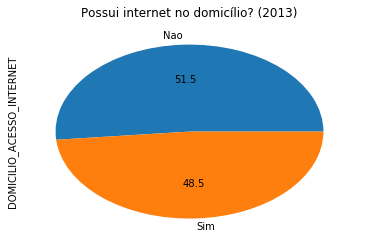

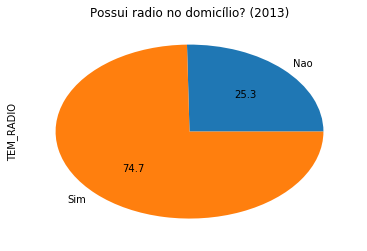

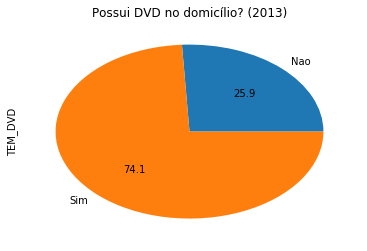

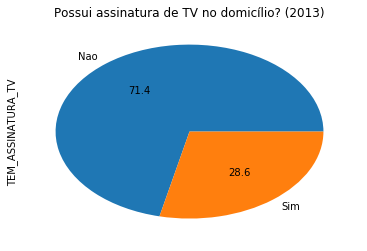

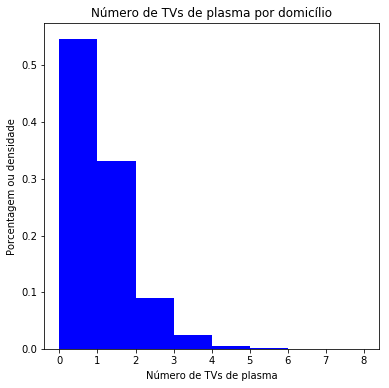

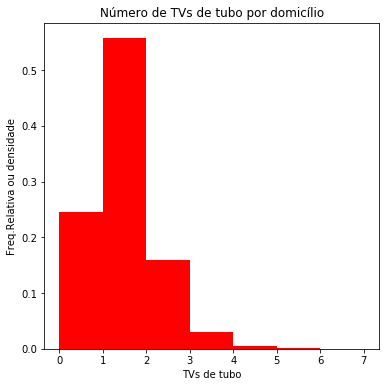

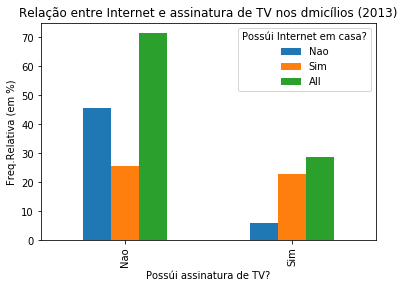

In [153]:
#2013
print("##########Dados de 2013##########")
dados = pd.read_csv('DOM2013.csv',sep=",")
#Internet
dados.V02322 = dados.V02322.astype('category')
dados.loc[(dados.V02322 == 2),"DOMICILIO_ACESSO_INTERNET"] = "Sim"
dados.loc[(dados.V02322 == 4),"DOMICILIO_ACESSO_INTERNET"] = "Nao"
#Radio
dados.V0225 = dados.V0225.astype('category')
dados.loc[(dados.V0225 == 1),"TEM_RADIO"] = "Sim"
dados.loc[(dados.V0225 == 3),"TEM_RADIO"] = "Nao"
#DVD
dados.V2027 = dados.V2027.astype('category')
dados.loc[(dados.V2027 == 1),"TEM_DVD"] = "Sim"
dados.loc[(dados.V2027 == 3),"TEM_DVD"] = "Nao"
#TV de Plasma
for i in range(0,11):
    dados.loc[(dados.V02270 == i),"NUMERO_TV_PLASMA"] = int(i)
#TV de Tubo
for i in range(0,11):
    dados.loc[(dados.V02271 == i),"NUMERO_TV_TUBO"] = int(i)
#Assinatura de TV
dados.V02272 = dados.V02272.astype('category')
dados.loc[(dados.V02272 == 1),"TEM_ASSINATURA_TV"] = "Sim"
dados.loc[(dados.V02272 == 3),"TEM_ASSINATURA_TV"] = "Nao"

#TABELA
tabela = pd.concat([dados.DOMICILIO_ACESSO_INTERNET,dados.TEM_RADIO,dados.TEM_DVD,dados.NUMERO_TV_PLASMA,dados.NUMERO_TV_TUBO,dados.TEM_ASSINATURA_TV], axis=1)
tabela = tabela.dropna()

#GRAFICO 1 - Freq. Relativa Internet
acessoInter = (tabela.DOMICILIO_ACESSO_INTERNET.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoInter.plot(kind='pie',title='Possui internet no domicílio? (2013)',autopct='%.1f')
plt.show()

#GRAFICO 2 - Freq. Relativa Radio
acessoRadio = (tabela.TEM_RADIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoRadio.plot(kind='pie',title='Possui radio no domicílio? (2013)',autopct='%.1f')
plt.show()

#GRAFICO 3 - Freq. Relativa DVD
acessoDvd = (tabela.TEM_DVD.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoDvd.plot(kind='pie',title='Possui DVD no domicílio? (2013)',autopct='%.1f')
plt.show()

#GRAFICO 4 - Freq. Relativa TV
acessoTV = (tabela.TEM_ASSINATURA_TV.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = acessoTV.plot(kind='pie',title='Possui assinatura de TV no domicílio? (2013)',autopct='%.1f')
plt.show()

# Tabelas univariada - TV de plasma
faixa = range(0,9,1)
#plasma = pd.cut(tabela.NUMERO_TV_PLASMA, bins=faixa, right=False)
#TVplasma = (plasma.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plot = dados.NUMERO_TV_PLASMA.plot.hist(bins=faixa, title='Número de TVs de plasma por domicílio', figsize=(6, 6), normed=1,color='b')
plt.ylabel('Porcentagem ou densidade')
plt.xlabel('Número de TVs de plasma')
plt.show()

# Tabelas univariada - TV de tubo
faixa = np.arange(0,8,1)
plot = dados.NUMERO_TV_TUBO.plot.hist(bins=faixa, title='Número de TVs de tubo por domicílio', figsize=(6, 6), normed=1,color='r')
plt.ylabel('Freq.Relativa ou densidade')
plt.xlabel('TVs de tubo')
plt.show()

#Tabela cruzada - TEM INTERNET x TEM ASSINATURA TV
crossINTERNET_ASS=pd.crosstab(dados.TEM_ASSINATURA_TV, dados.DOMICILIO_ACESSO_INTERNET, margins=True, rownames=['Possúi assinatura de TV?'], colnames=['Possúi Internet em casa?'], normalize=True)*100
plot = crossINTERNET_ASS.iloc[0:2].plot(kind='bar', title='Relação entre Internet e assinatura de TV nos dmicílios (2013)')
plt.ylabel('Freq.Relativa (em %)')
plt.show()

#
tabela.to_csv('Projeto1_v2FINAL2013_Rafael.csv', sep=',')
#tabela[(dados.DOMICILIO_ACESSO_INTERNET == "Sim") | (dados.DOMICILIO_ACESSO_INTERNET == "Nao")]
#tabela
#porcent = pd.Series([acessoInter["Sim"], acessoRadio["Sim"], acessoDvd["Sim"], acessoTV["Sim"]],[acessoInter["Nao"], acessoRadio["Nao"], acessoDvd["Nao"], acessoTV["Nao"]])
#porcent


___
## Análise dos dados e Conclusão 

<p>Retomando nossa pergunta inicial, <b>será que a internet passou a ser uma prioridade no Brasil em relação a outros meios de comunicação tradicionais?</b> A partir da anáise dos dados acima, fica claro o avanço gradual da internet. Em 2013 48.5% dos domicílios brasileiros possuíam acesso a internet. Ja em 2015, esse número subiu para 58.8%, ou seja, 10% de aumento. Isso é um primero passo para tentar responder nossa pergunta. 
</p>
<p>
Outro dado que pode nos ajudar a chegar a uma conclusão é se o dmicílio possúi ou não a TV por assinatura. Esse pode ser um dos, senão o dado mais interessante a ser analisado, já que ele se assemelha à internet no que se diz à assinatura de um pacote e de condições de trasmissão de dados. O que pode-se observar pelos gráficos é que os domicílios com TV por assinatura tiveram um leve, e não tão significativo, aumento em sua freqência relativa, já que passamos de 28.6% em 2013 para 30.9% em 2015, enquanto a Internet teve um aumento de mais de 10% em sua frequência relativa, sem considerar que a TV por assinatura está presente em pouco menos de 1/3 das casas e a Internet está em mais da metade dos domicílios. Além disso, observa-se pelo gráfico de relação entre internet e TV por assinatura que as famílias que possuem TV por assinatura, em sua maioria, também possuem internet. Porém, das pessoas que não possuem TV por assinatura, quase metade delas têm internet (dados de 2015). Ou seja, isso é mais um indício de que as pessoas estão optando cada vez mais pela internet em suas casas em realação à TV por assinatura. 
</p>
<p>
Por fim, para fecharmos a análise, podemos pegar a frequência relativa de rádios e DVDs nos domicílios ao longo dos anos em comparação à internet. E o que se observa é uma queda na quantidade relativa de DVDs e rádios de praticamente 10% em ambos os casos, enquanto para a internet tivemos um aumento de 10% nos domicílios brasileiros, entre 2013 e 2015.
</p>
<p>
Portanto, foi possível sim ver uma evolução significativa na prioridade dos brasileiros em relação à internet em seus domicílios durante os anos de 2013, 2014 e 2015. Isso é dado pela clara queda na utilização de meios de comunicação e de mídias mais antigas, como o DVD e rádio e pela difusão da internet nos domicílios brasileiros. Isso pode nos levar a comcluir que a sociedade brasileira está sim se atualizando tecnologicamente de forma rápida. Embora Ainda existam muitas pessoas sem internet em seus domicílios, é possível concluir que a internet será algo que os brasileiros continuarão valorizando, até que uma nova tecnologia venha a surgir.
</p>
    